# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Imports and helper functions

In [2]:
# Load pickled data
import pickle
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import random as random
# Visualizations will be shown in the notebook.
%matplotlib inline
import sys
import cv2
import scipy.ndimage
from sklearn.model_selection import train_test_split
import os
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import matplotlib.image as mpimg

In [3]:
# logging function to print iterations progress
def print_progress(iteration, total):
    """
    Call in a loop to create terminal progress bar
    
    Parameters
    ----------
        
    iteration : Current iteration (Int)
    total     : Total iterations (Int)
    """
    str_format = "{0:.0f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(100 * iteration / float(total)))
    bar = '█' * filled_length + '-' * (100 - filled_length)

    sys.stdout.write('\r |%s| %s%%' % (bar, percents)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

helper function for image processing

In [4]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def sharpen_img(img):
    """
    Applies the Gaussian Blur on original image using openCV library
    
    """
    gb = cv2.GaussianBlur(img, (3,3), 20)
    return cv2.addWeighted(img, 2, gb, -1.5, 0)

def eq_Hist(img):
    #Histogram Equalization
    img2=img.copy() 
    img2[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img2[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img2[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return img2

def gamma_correction(img, correction):
    img = img/255.0
    img = cv2.pow(img, correction)
    return np.uint8(img*255)

---
## Step 0: Load The Data

In [5]:
training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
signnames = read_csv("signnames.csv").values[:, 1]

#Number of training examples
n_train = len(X_train)

#Number of validation examples
n_validation = len(X_valid)

#Number of testing examples.
n_test = len(X_test)

#Shape of an traffic sign image?
image_shape = X_train[0].shape
image_size = image_shape[0]

#How many unique classes/labels there are in the dataset.
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
n_classes = class_counts.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Check out the sign samples. We will go through all dataset classes, plotting 10 random images for each unique class.

Class 0: Speed limit (20km/h)                                180 samples


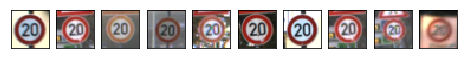

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                                1980 samples


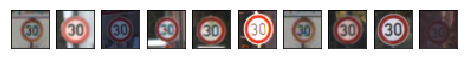

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                                2010 samples


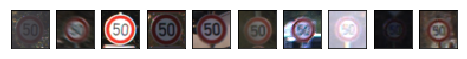

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                                1260 samples


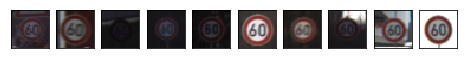

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                                1770 samples


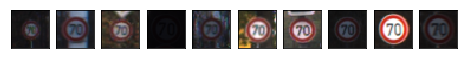

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                                1650 samples


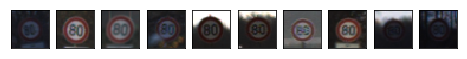

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                         360 samples


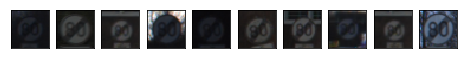

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                               1290 samples


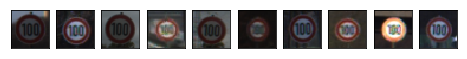

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                               1260 samples


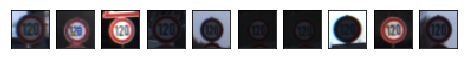

--------------------------------------------------------------------------------------

Class 9: No passing                                          1320 samples


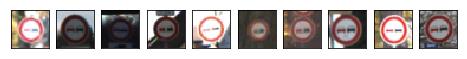

--------------------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons        1800 samples


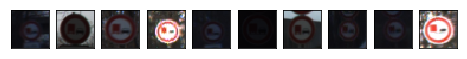

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection               1170 samples


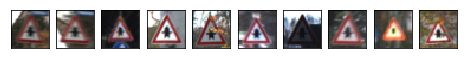

--------------------------------------------------------------------------------------

Class 12: Priority road                                       1890 samples


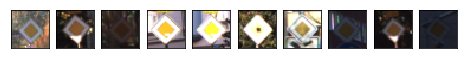

--------------------------------------------------------------------------------------

Class 13: Yield                                               1920 samples


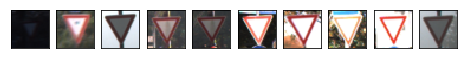

--------------------------------------------------------------------------------------

Class 14: Stop                                                690 samples


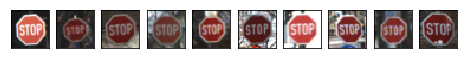

--------------------------------------------------------------------------------------

Class 15: No vehicles                                         540 samples


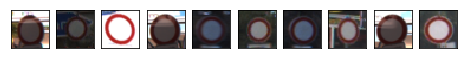

--------------------------------------------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited            360 samples


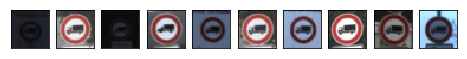

--------------------------------------------------------------------------------------

Class 17: No entry                                            990 samples


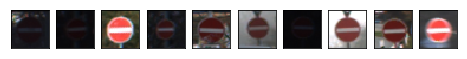

--------------------------------------------------------------------------------------

Class 18: General caution                                     1080 samples


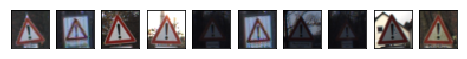

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                         180 samples


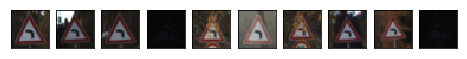

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                        300 samples


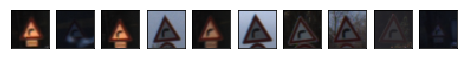

--------------------------------------------------------------------------------------

Class 21: Double curve                                        270 samples


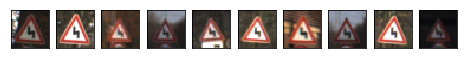

--------------------------------------------------------------------------------------

Class 22: Bumpy road                                          330 samples


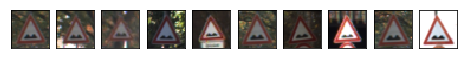

--------------------------------------------------------------------------------------

Class 23: Slippery road                                       450 samples


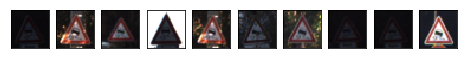

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right                           240 samples


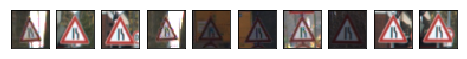

--------------------------------------------------------------------------------------

Class 25: Road work                                           1350 samples


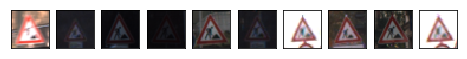

--------------------------------------------------------------------------------------

Class 26: Traffic signals                                     540 samples


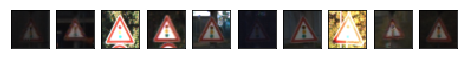

--------------------------------------------------------------------------------------

Class 27: Pedestrians                                         210 samples


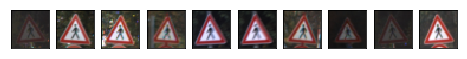

--------------------------------------------------------------------------------------

Class 28: Children crossing                                   480 samples


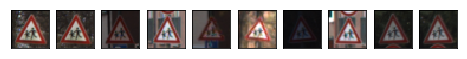

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                   240 samples


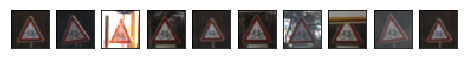

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                  390 samples


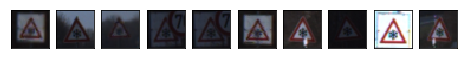

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing                               690 samples


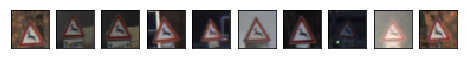

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                 210 samples


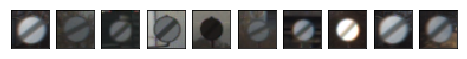

--------------------------------------------------------------------------------------

Class 33: Turn right ahead                                    599 samples


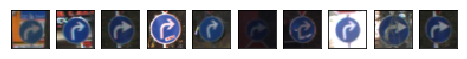

--------------------------------------------------------------------------------------

Class 34: Turn left ahead                                     360 samples


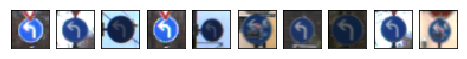

--------------------------------------------------------------------------------------

Class 35: Ahead only                                          1080 samples


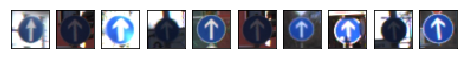

--------------------------------------------------------------------------------------

Class 36: Go straight or right                                330 samples


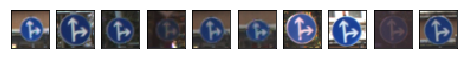

--------------------------------------------------------------------------------------

Class 37: Go straight or left                                 180 samples


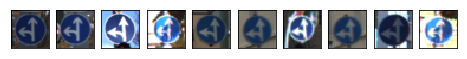

--------------------------------------------------------------------------------------

Class 38: Keep right                                          1860 samples


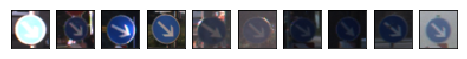

--------------------------------------------------------------------------------------

Class 39: Keep left                                           270 samples


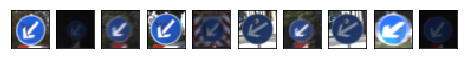

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                                300 samples


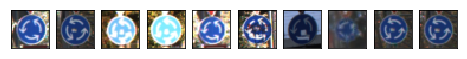

--------------------------------------------------------------------------------------

Class 41: End of no passing                                   210 samples


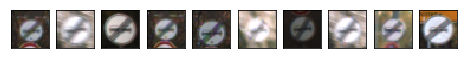

--------------------------------------------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons  210 samples


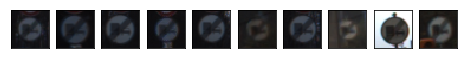

--------------------------------------------------------------------------------------



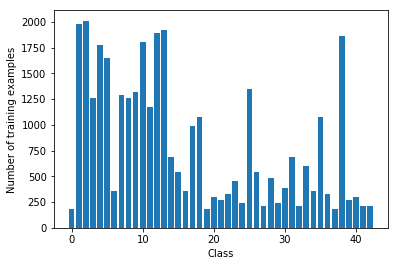

Min number of images per class = 180
Max number of images per class = 2010


In [8]:
### Data exploration visualization 

col_width = max(len(name) for name in signnames)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = plt.figure(figsize = (8, 2))
#     fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()
    print("--------------------------------------------------------------------------------------\n")
    
plt.bar( np.arange( n_classes ), class_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.show()

print("Min number of images per class =", min(class_counts))
print("Max number of images per class =", max(class_counts))  

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Example of original image and corresponding results after series of preprocessing

Class 1: Speed limit (30km/h)                              


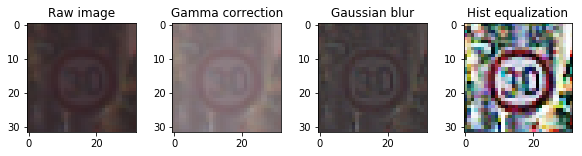

In [11]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

gamma = gamma_correction(image, 0.45)
sharp = sharpen_img(gamma)
histeq = eq_Hist(sharp)
print("Class %i: %-*s" % (y_train[index], col_width, signnames[y_train[index]]))

plt.figure(figsize=(10, 2))
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("Raw image")
plt.subplot(1, 4, 2)
plt.imshow(gamma)
plt.title("Gamma correction")
plt.subplot(1, 4, 4)
plt.imshow(histeq)
plt.title("Hist equalization")
plt.subplot(1, 4, 3)
plt.imshow(sharp)
plt.title("Gaussian blur")  


### Pipeline for image processing

In [12]:
def preprocessing(image) :
    gamma = gamma_correction(image, 0.45)
    sharp = sharpen_img(gamma)
    histeq = eq_Hist(sharp)

    return histeq

### Pre-process the training/validation/testing image

In [13]:
print('Preprocessing training data...')
X_train_process = X_train.copy()
for i in range(X_train.shape[0]):
    X_train_process[i] = preprocessing(X_train[i])
    print_progress(i + 1, X_train.shape[0])
print('Preprocessing on training data is completed') 

print("\n")
print('Preprocessing test data...')
X_test_process = X_test.copy()
for i in range(X_test.shape[0]):
    X_test_process[i] = preprocessing(X_test[i])
    print_progress(i + 1, X_test.shape[0])    
print('Preprocessing on test data is completed') 

Preprocessing training data...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Preprocessing on training data is completed


Preprocessing test data...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Preprocessing on test data is completed


### Augment training data

In [15]:
X_train_extended = X_train_process
y_train_extended = y_train
sign_classes_ext, class_indices_ext, class_counts_ext = np.unique(y_train_extended, return_index = True, return_counts = True)

In [16]:
# Generate additional data for underrepresented classes
print('Generating additional data by rotating...')

angles_max = 20
angles_min = -20 

X_train_aug = X_train_extended.copy()
y_train_aug = y_train_extended.copy()

for i in range(len(class_counts_ext)):
    
    input_ratio = int(max(class_counts_ext) / class_counts_ext[i])
    angles = np.linspace(angles_min,angles_max, input_ratio)


    mask = np.where(y_train_extended == i)
    
    new_features = []
    new_labels = []
    
    if class_counts_ext[i] == max(class_counts_ext):
        continue
        
    for j in range(input_ratio):
        
        for feature in X_train_extended[mask]:
            
            new_features.append(scipy.ndimage.rotate(feature, angles[j], reshape=False))
            new_labels.append(i)
            
    X_train_aug = np.append(X_train_aug, new_features, axis=0)
    y_train_aug = np.append(y_train_aug, new_labels, axis=0)
    
    print_progress(i + 1, len(class_counts_ext))
                   
# Normalize features
print("\n")
print('Normalizing features...')

train_features = (X_train_aug / 255.).astype(np.float32)
train_labels = y_train_aug

# Get randomized datasets for training and validation
print("\n")
print('Randomizing datasets...')
train_features, valid_features, train_labels, valid_labels = train_test_split(
   train_features,
   train_labels,
   test_size=0.33,
   random_state=666
)
print("\n")
print('Data preprocessed')

Generating additional data by rotating...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%


Normalizing features...


Randomizing datasets...


Data preprocessed


Visualize the augmented data

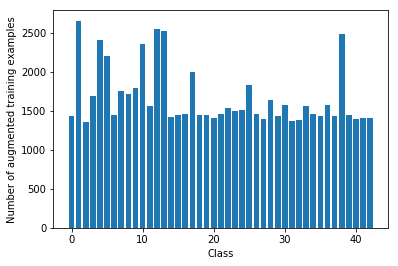

Min number of images per class after augmentation = 1360
Max number of images per class after augmentation = 2652


In [21]:
sign_classes_aug, class_indices_aug, class_counts_aug = np.unique(train_labels, return_index = True, return_counts = True)
    
plt.bar( np.arange(n_classes ), class_counts_aug, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of augmented training examples')
plt.show()

print("Min number of images per class after augmentation =", min(class_counts_aug))
print("Max number of images per class after augmentation =", max(class_counts_aug))  


### Check point and save the preprocessed data

In [22]:
# Save the data for easy access
pickle_file = 'Traffic_sign_recognition.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('Traffic_sign_recognition.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features,
                    'train_labels': train_labels,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': X_test_process,
                    'test_labels': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Data cached in pickle file.


### Import the processed data for training and testing

In [23]:
# Reload the data
signnames = read_csv("signnames.csv").values[:, 1]
pickle_file = 'Traffic_sign_recognition.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f) 
    train_features = pickle_data['train_dataset']
    train_labels = pickle_data['train_labels']
    valid_features = pickle_data['valid_dataset']
    valid_labels = pickle_data['valid_labels']
    test_features = pickle_data['test_dataset']
    test_labels = pickle_data['test_labels']
    del pickle_data  # Free up memory


print('Data and modules loaded.')

Data and modules loaded.


### Double check the imported features/labels

Class 10: No passing for vehicles over 3.5 metric tons      


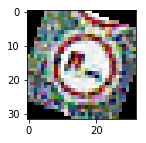

In [24]:
index = random.randint(0, len(train_features))
col_width = max(len(name) for name in signnames)
image_process = train_features[index].squeeze()
plt.figure(figsize=(2, 2))
plt.imshow(image_process)
print("Class %i: %-*s" % (train_labels[index], col_width, signnames[train_labels[index]]))

### Model Architecture

In [26]:
EPOCHS = 150
BATCH_SIZE = 128

# Hyperparameters
mu = 0.0
sigma = 0.01
dropout = 0.5 #dropout rate
rate = 0.0005 #learning rate


def conv_layer(x, filter_w, s, in_depth, out_depth):
    conv_W = tf.Variable(tf.truncated_normal(shape=(filter_w, filter_w, in_depth, out_depth), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(out_depth))
    conv_res   = tf.nn.conv2d(x, conv_W, strides=[s, s, s, s], padding='VALID') + conv_b
    return conv_res

def conv_relu_layer(x, filter_w, s, in_depth, out_depth):
    conv_W = tf.Variable(tf.truncated_normal(shape=(filter_w, filter_w, in_depth, out_depth), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(out_depth))
    conv_res   = tf.nn.conv2d(x, conv_W, strides=[s, s, s, s], padding='VALID') + conv_b
    return tf.nn.relu(conv_res)

def maxpool_stride_layer(x, filter_w, s):
    return tf.nn.max_pool(x,ksize=[1,filter_w,filter_w,1], strides=[1,s,s,1],padding='VALID')

def fc_layer(x, a, b):
    fc_W = tf.Variable(tf.truncated_normal(shape=(a, b), mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(b))
    fc = tf.matmul(x, fc_W) + fc_b
    return tf.nn.relu(fc)

In [27]:
### DeepNet architecture    
def DeepNet_dropout(x, out=43):  
    
    # input 32 X 32 X 3 with strides = 1
    
    conv1 = conv_relu_layer(x, 5, 1, 3, 100) # output 28 x 28 x 100
    
    maxpool1 = maxpool_stride_layer(conv1, 2, 2) # output 14 x 14 x 100
    
    conv2 = conv_relu_layer(maxpool1, 3, 1, 100, 150) # output 12 x 12 x 150
   
    maxpool2 = maxpool_stride_layer(conv2, 2, 2) # output 6 x 6 x 150
    
    fc0 = flatten(maxpool2) # output 6 x 6 x 150
    
    fc1 = fc_layer(fc0, 6*6*150, 300)
    
#     fc2 = fc_layer(fc1, 300, 180)
    fc1 = tf.nn.dropout(fc1, keep_prob)     

    fc3_w = tf.Variable(tf.truncated_normal(shape = (300, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc3_w) + fc3_b 
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [28]:
n_classes = 43
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

logits = DeepNet_dropout(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [29]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, dropout):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        [accuracy, loss] = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss *len(batch_x))
    return (total_accuracy / num_examples, total_loss / num_examples)

In [30]:
def plot_curve(axis, train_results, valid_results, linewidth = 2, train_linestyle = "b-", valid_linestyle = "g-"):
    """
    Plots a pair of validation and training curves on a single plot.
    """
    epochs = train_results.shape[0]
    x_axis = np.arange(epochs)
    axis.plot(x_axis[train_results > 0], train_results[train_results > 0], train_linestyle, linewidth=linewidth, label="train")
    axis.plot(x_axis[valid_results > 0], valid_results[valid_results > 0], valid_linestyle, linewidth=linewidth, label="valid")
    return epochs

# Plots history of learning curves for a specific model.
def plot_learning_curves(train_loss, valid_loss, train_acc, valid_acc):
    """
    Plots learning curves (loss and accuracy on both training and validation sets).
    """
    curves_figure = plt.figure(figsize = (10, 4))
    axis = curves_figure.add_subplot(1, 2, 1)
    epochs_plotted = plot_curve(axis, train_acc, valid_acc)

    plt.grid()
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.ylim(50, 110.)
    plt.xlim(0, epochs_plotted)

    axis = curves_figure.add_subplot(1, 2, 2)
    epochs_plotted = plot_curve(axis, train_loss, valid_loss)

    plt.grid()
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.ylim(0.001, 1)
    plt.xlim(0, epochs_plotted)
    plt.yscale("log")

In [50]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_features)
    
    train_loss_history = np.empty([0], dtype = np.float32)
    train_accuracy_history = np.empty([0], dtype = np.float32)
    valid_loss_history = np.empty([0], dtype = np.float32)
    valid_accuracy_history = np.empty([0], dtype = np.float32)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(train_features, train_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        training_accuracy, training_loss = evaluate(train_features, train_labels, dropout)    
        validation_accuracy, validation_loss = evaluate(valid_features, valid_labels, 1)
        
        print('Training accuracy: %.1f%%, Loss: %.3f for epoch %d' % 
              (100*training_accuracy, training_loss, i + 1 ))
        print('Validation accuracy: %.1f%%, Loss: %.3f for epoch %d' % 
              (100*validation_accuracy, validation_loss, i + 1 ))
        
        valid_loss_history = np.append(valid_loss_history, [validation_loss])
        valid_accuracy_history = np.append(valid_accuracy_history, [validation_accuracy])
        train_loss_history = np.append(train_loss_history, [training_loss])
        train_accuracy_history = np.append(train_accuracy_history, [training_accuracy])

    saver.save(sess, './traffic_sign_model_v1')
    print("Model saved")

Training...

Training accuracy: 72.8%, Loss: 0.888 for epoch 1
Validation accuracy: 85.1%, Loss: 0.639 for epoch 1
Training accuracy: 87.2%, Loss: 0.391 for epoch 2
Validation accuracy: 95.2%, Loss: 0.409 for epoch 2
Model saved


In [19]:
plot_learning_curves(train_loss_history, valid_loss_history, 100*train_accuracy_history, 100*valid_accuracy_history)
# plt.savefig('Training accuracy and loss', frameon = None)

NameError: name 'train_loss_history' is not defined

Test the trained model

In [31]:
test_features = (X_test_process / 255.).astype(np.float32)
test_labels = y_test

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy, test_loss = evaluate(test_features, test_labels, 1)    
    print('Test accuracy: %.1f%%' % (100*test_accuracy))


Test accuracy: 96.8%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

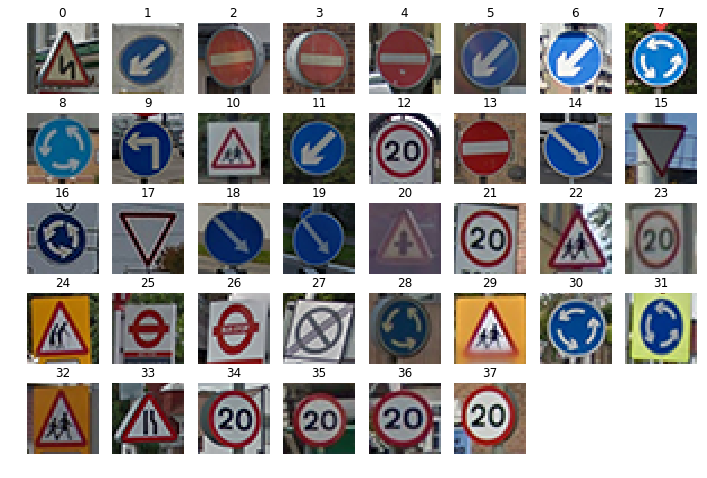

In [32]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
lists = os.listdir("new_images/")

X_new = np.empty([0, 32, 32, 3], dtype = np.int32)
for list in lists:
    image = mpimg.imread('new_images/' + list)
    X_new = np.append(X_new, [image[:, :, :3]], axis = 0)

# Provide labels of the captured images:
y_new = np.array([
    21, # "example_00001"
    39, # "example_00002"
    17, # "example_00003"
    17, # "example_00004"
    17, # "example_00005"
    39, # "example_00006"
    39, # "example_00007"
    40, # "example_00008"
    40, # "example_00009"
    34, # "example_00010"
    28, # "example_00011"
    39, # "example_00012"
    0, # "example_00013"
    17, # "example_00014"
    38, # "example_00015"
    13, # "example_00016"
    40, # "example_00017"
    13, # "example_00018"
    38, # "example_00019"
    38, # "example_00020"
    11, # "example_00021"
    0, # "example_00022"
    28, # "example_00023"
    0, # "example_00024"
    99, # "example_00025"
    99, # "example_00026"
    99, # "example_00027"
    32, # "example_00028"
    40, # "example_00029"
    28, # "example_00030"
    40, # "example_00031"
    40, # "example_00032"
    28, # "example_00033"
    24, # "example_00034"
    0, # "example_00035"
    0, # "example_00036"
    0, # "example_00037"
    0 # "example_00038"
])

#Visualize new raw images
plt.figure(figsize=(12, 8))
for i in range(len(X_new)):
    plt.subplot(5, 8, i+1)
    plt.imshow(X_new[i]) 
    plt.title(i)
    plt.axis('off')
plt.show()

Preprocessing new data...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Preprocessing on new data is completed


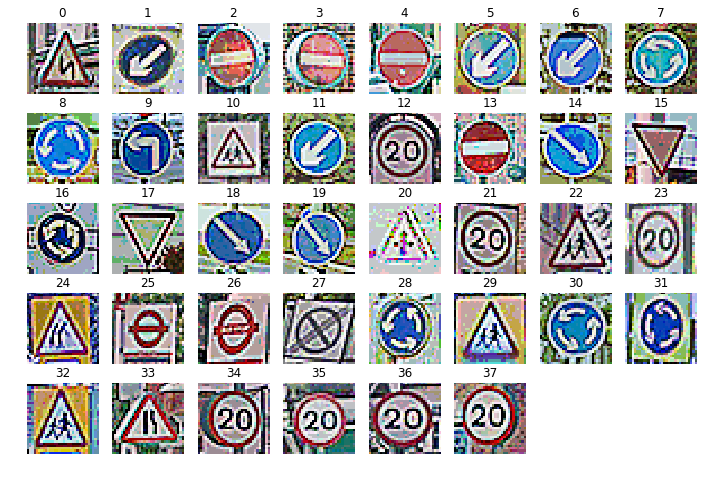

In [33]:
print('Preprocessing new data...')
X_new_process = X_new.copy()
for i in range(X_new.shape[0]):
    X_new_process[i] = preprocessing(X_new[i])
    print_progress(i + 1, X_new.shape[0])
print('Preprocessing on new data is completed')

test_features_new = (X_new_process / 255.).astype(np.float32)
test_labels_new = y_new

plt.figure(figsize=(12, 8))
for i in range(len(X_new)):
    plt.subplot(5, 8, i+1)
    plt.imshow(test_features_new[i]) 
    plt.title(i)
    plt.axis('off')
plt.show()

### Predict the Sign Type for Each Image and Output Top 5 Softmax Probabilities

In [34]:
def top_k_predictions(X_data, k = 5):
    """
    Evaluates `X` on a model defined by `params` and returns top 5 predictions.

    Parameters
    ----------
    X         : Testing dataset. 
    k         : Number of top predictions we are interested in.
                
    Returns
    -------
    An array of top k softmax predictions for each example.
    """
    sess = tf.get_default_session()
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data, keep_prob: 1.0})    
    top_5 = tf.nn.top_k(prob, k=5)
    
    return sess.run(top_5)

def plot_image(predictions, index):
    """
    Plots prediction statistics for a single example.

    Parameters
    ----------
    predictions   : Array of predictions.
    index         : Index of the example to plot
    """
    # Prepare original and preprocessed images
    original = X_new[index]
    preprocessed = test_features_new[index]   
    
#     # Prepare the grid
    plt.figure(figsize = (16, 2))
#     gridspec.GridSpec(2, 2)
    
    # Plot original image
    plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    plt.imshow(original)
    plt.axis('off')

    # Plot preprocessed image
    plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
    plt.imshow(preprocessed)
    plt.axis('off')

    # Plot predictions
    plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    plt.barh(np.arange(1, 6, 1), predictions.values[i, :])
    labs=[signnames[j] for j in predictions.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
    
    plt.show()


Actual class:  Double curve


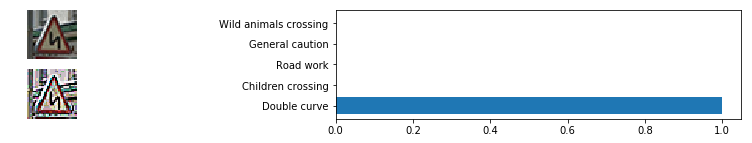

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


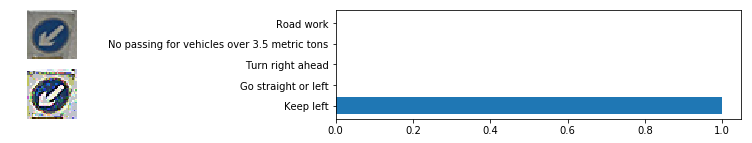

---------------------------------------------------------------------------------------------------

Actual class:  No entry


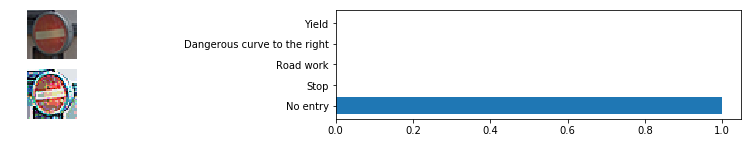

---------------------------------------------------------------------------------------------------

Actual class:  No entry


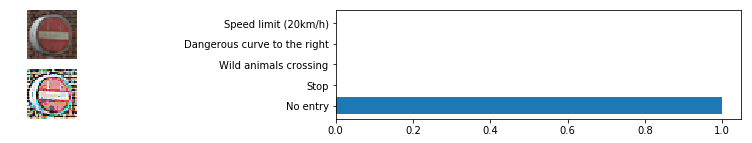

---------------------------------------------------------------------------------------------------

Actual class:  No entry


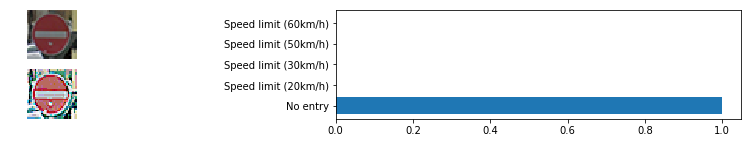

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


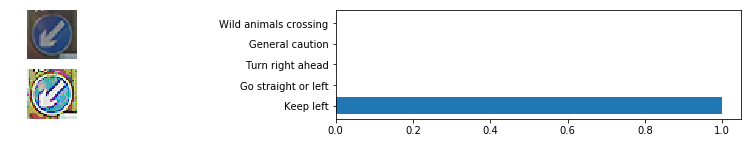

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


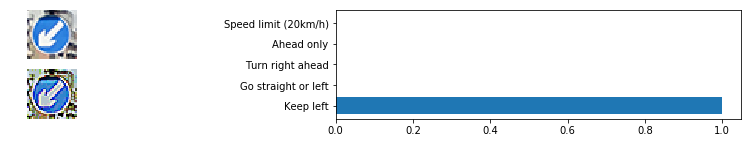

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


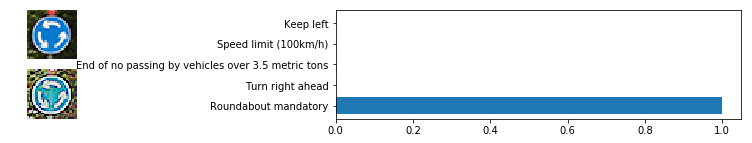

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


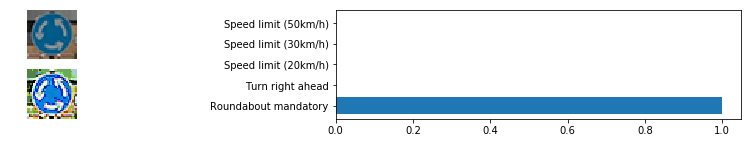

---------------------------------------------------------------------------------------------------

Actual class:  Turn left ahead


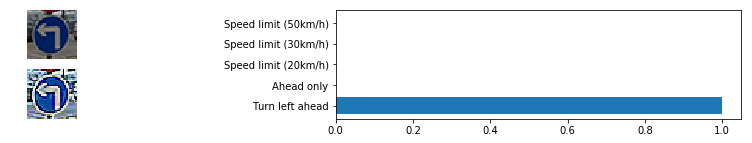

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


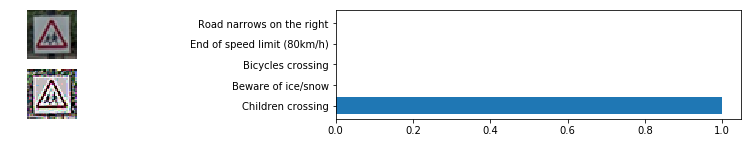

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


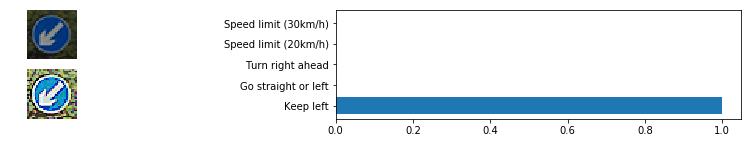

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


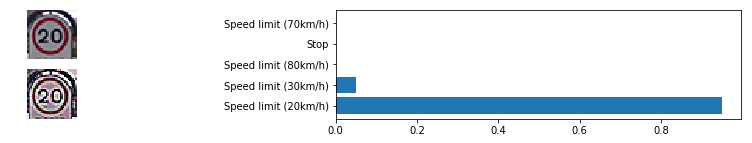

---------------------------------------------------------------------------------------------------

Actual class:  No entry


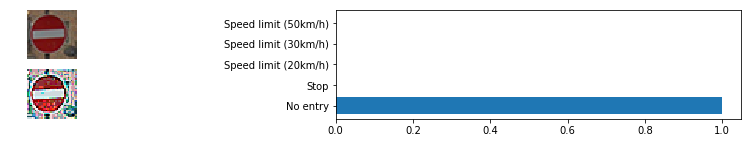

---------------------------------------------------------------------------------------------------

Actual class:  Keep right


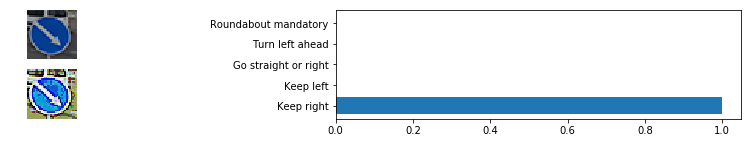

---------------------------------------------------------------------------------------------------

Actual class:  Yield


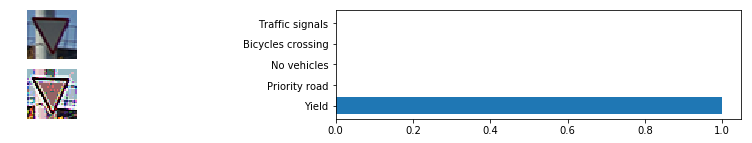

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


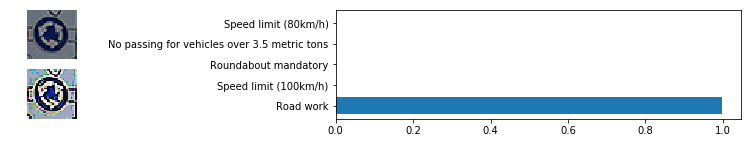

---------------------------------------------------------------------------------------------------

Actual class:  Yield


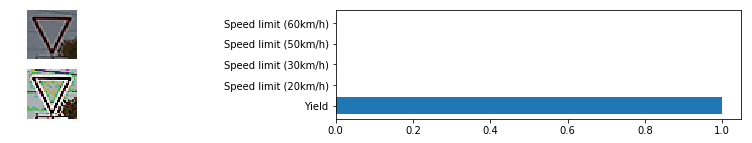

---------------------------------------------------------------------------------------------------

Actual class:  Keep right


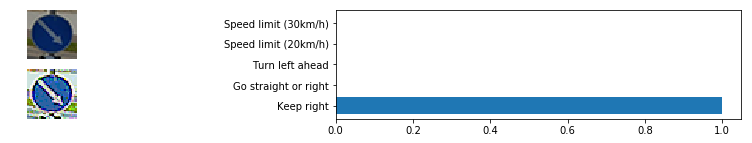

---------------------------------------------------------------------------------------------------

Actual class:  Keep right


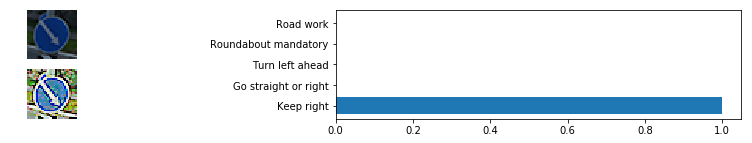

---------------------------------------------------------------------------------------------------

Actual class:  Right-of-way at the next intersection


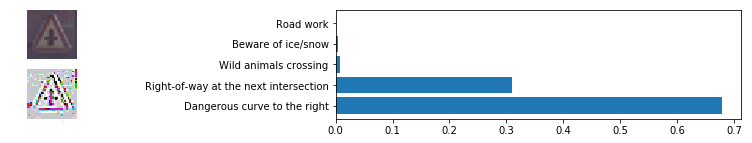

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


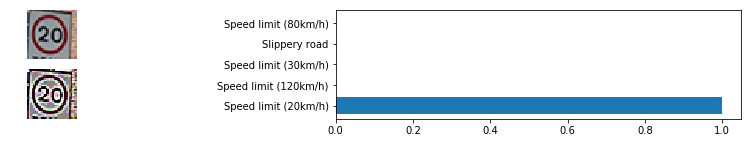

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


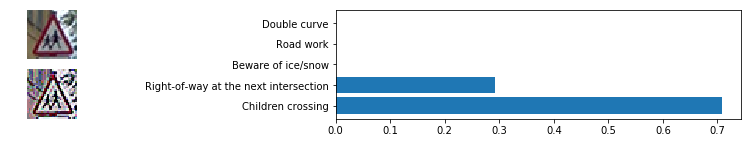

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


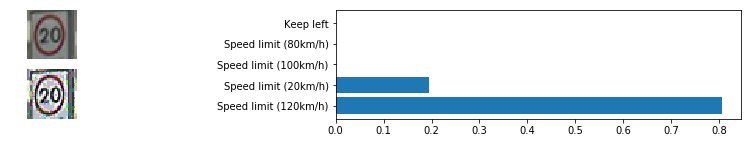

---------------------------------------------------------------------------------------------------

Actual class:  None


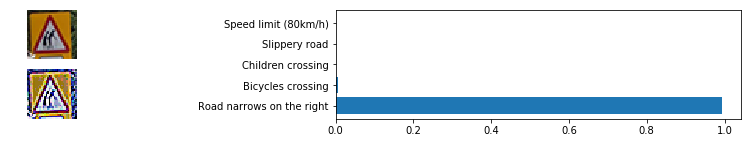

---------------------------------------------------------------------------------------------------

Actual class:  None


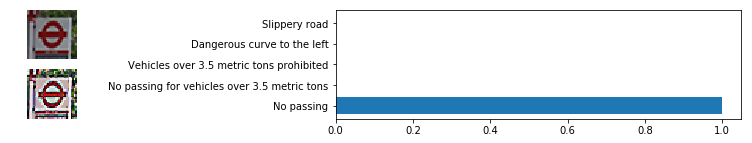

---------------------------------------------------------------------------------------------------

Actual class:  None


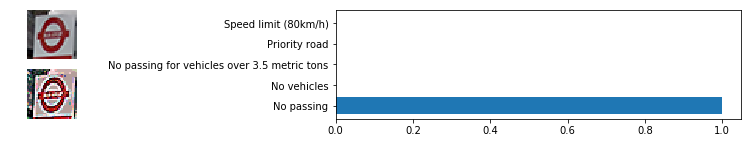

---------------------------------------------------------------------------------------------------

Actual class:  End of all speed and passing limits


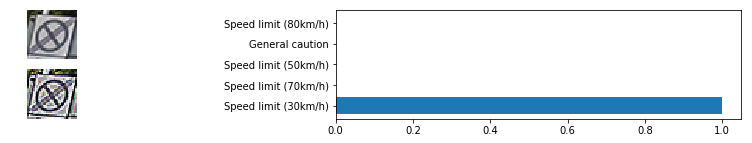

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


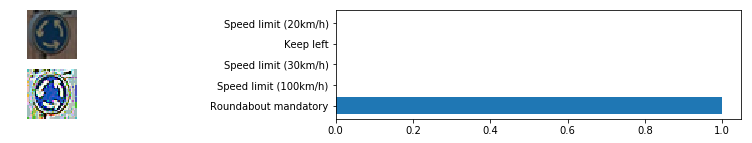

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


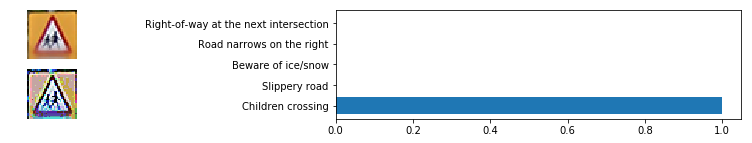

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


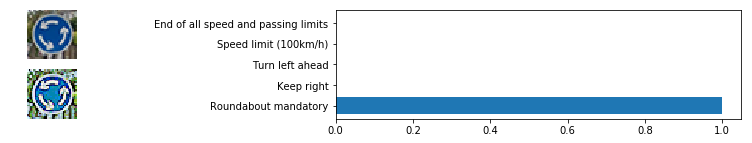

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


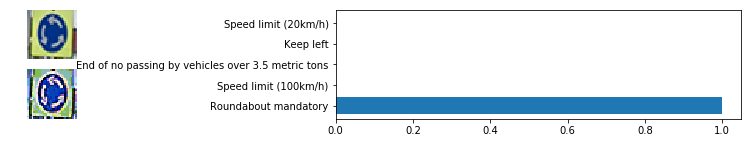

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


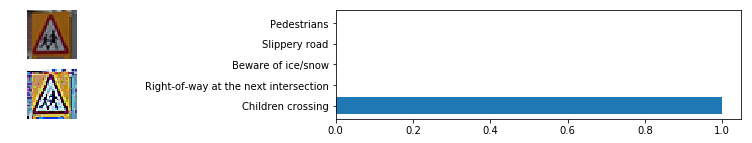

---------------------------------------------------------------------------------------------------

Actual class:  Road narrows on the right


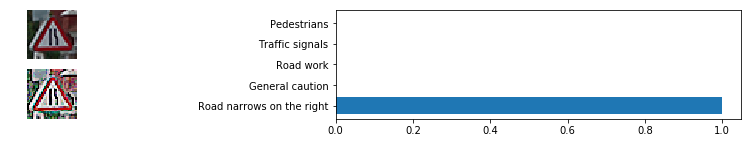

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


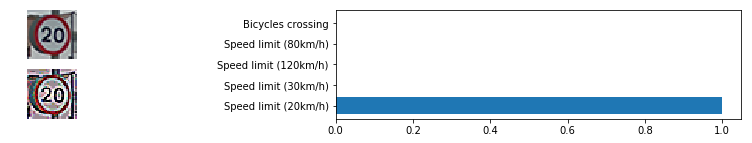

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


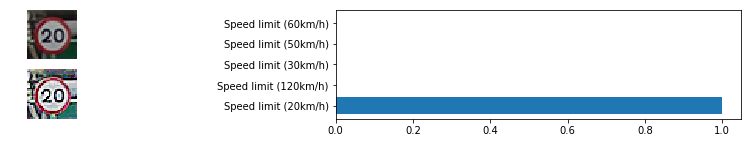

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


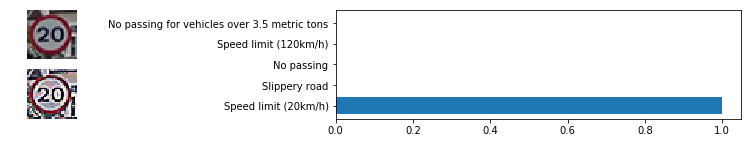

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


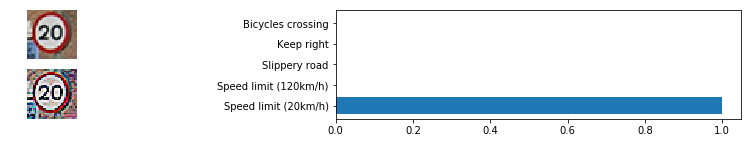

---------------------------------------------------------------------------------------------------



In [35]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = top_k_predictions(test_features_new)

# For every example plot original image, preprocessed image, and model predictions.
for i in range(38):
    print("Actual class: ", signnames[y_new[i]] if y_new[i] != 99 else "None")
    plot_image(predictions, i)
    print("---------------------------------------------------------------------------------------------------\n")

### Analyze Performance

In [36]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
test_features_new = (X_new_process / 255.).astype(np.float32)
test_labels_new = y_new
### get rid of the ones that is not on the list
test_features_new = test_features_new[y_new < 99]
test_labels_new = test_labels_new[y_new < 99]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy, test_loss = evaluate(test_features_new, test_labels_new, 1)    

print("Accuracy on captured images: %.1f%%" % (100*test_accuracy))

Accuracy on captured images: 88.6%


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.